In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

##### from colab sample_data

In [2]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
test_df = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


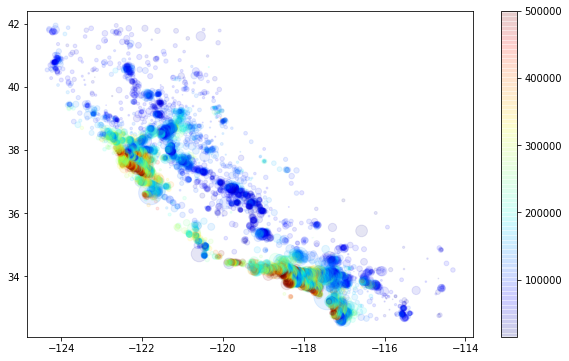

In [18]:
# population and median_house_value latitude and longitude plotting

plt.figure(figsize=(10,6))
coordinates_vs_population = plt.scatter(x=df['longitude'].values, 
            y = df['latitude'].values,
            alpha=0.1, 
            s=df['population'].values/50,
            label='population',
            c=df['median_house_value'].values,
            cmap=plt.get_cmap("jet"),
            )
plt.colorbar(coordinates_vs_population)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fefd17b2f10>,
      dtype=object)

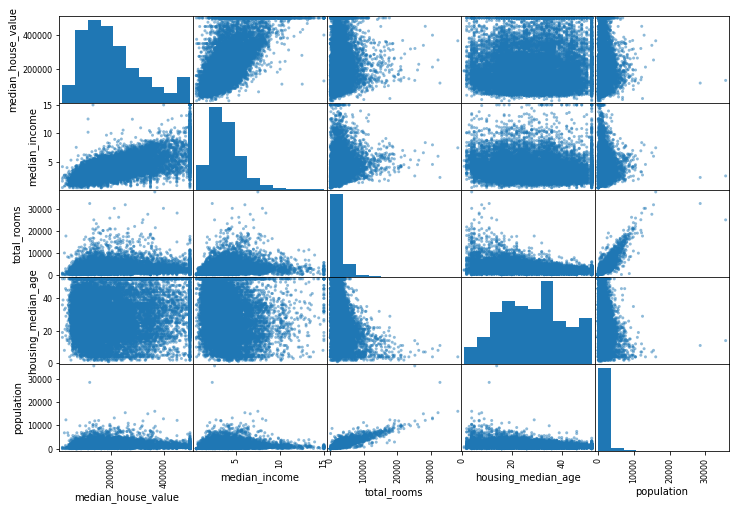

In [21]:
# scatter matrix

from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age", "population"]
scatter_matrix(df[attributes], figsize=(12, 8))

In [46]:
# correlation between median_income and median_house_value

correlation = df.corr()
print(correlation['median_house_value'])

longitude            -0.044982
latitude             -0.144917
housing_median_age    0.106758
total_rooms           0.130991
total_bedrooms        0.045783
population           -0.027850
households            0.061031
median_income         0.691871
median_house_value    1.000000
Name: median_house_value, dtype: float64


In [100]:
# data prep


X_train = df.iloc[:,:8].values
y_train = df.iloc[:,-1].values


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
    
X_test = test_df.iloc[:,:8].values
y_test = test_df.iloc[:,-1].values

X_test = scaler.transform(X_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(17000, 8) (17000,)
(3000, 8) (3000,)


### Model

In [101]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_test_pred = regressor.predict(X_test)

In [102]:
print(y_test.shape, y_test_pred.shape)

(3000,) (3000,)


In [103]:
# metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_loss = mean_squared_error(y_test, y_test_pred)
mae_loss = mean_absolute_error(y_test, y_test_pred)
print("mse:",mse_loss)
print("mae:",mae_loss)
print('train_score:',round(regressor.score(X_train, y_train),4)*100,'%')
print('test_score:',round(regressor.score(X_test, y_test),4)*100,'%')


# direct comparison
print('0th actual:',y_test[0], '| 0th predicted:',y_test_pred[0])

mse: 4867205486.928867
mae: 50352.228257942894
train_score: 64.13 %
test_score: 61.95 %
0th actual: 344700.0 | 0th predicted: 352812.3111245446


In [111]:
# visualization

print(np.argmin(y_test_pred))
# oh wow this is shockingly terrible
print(y_test[2186], y_test_pred[2186])

2186
137500.0 -207365.84113559755
